In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

# Topic : 서울시 구별 범죄 현황 분석

### point 

- CCTV와 범죄, 검거율에 관계가 있는가?
- 강남 3구는 과연 범죄 발생율이 낮고 검거율이 높은가?
- 우리 동네는 어떤가?

## 1. Data Definition

- http://data.go.kr

In [2]:
crime_anal_police = pd.read_csv("data/seoul/crime_in_seoul.csv", encoding="euc-kr", thousands=",")
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [3]:
crime_anal_police.info() # int가 아닌 애들도 있다? 왜? # 발생건수가 많아서 ,를 넣어야해서. # thousands="," 입력하기 전info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


In [4]:
crime_anal_police.info() # thousands=","입력 후 모두 int형으로 바뀌었다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


## 2. EDA & Preprocessing

### (1) 관서명을 구 이름으로 변경

- https://ko.wikipedia.org/wiki/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%EA%B2%BD%EC%B0%B0%EC%B2%AD

- API를 이용하여 주소 정보를 획득
    - 구글 GoogleMap API 사용
        - http://cloud.google.com
        - http://developer.google.com
        - AIzaSyDmd1WurzaRYWIcH_************
        - API 서비스 및 인증 > 사용자 인증 정보 > API 키 수정
        - 
        
        
    - Kakao API 이용

#### 1) GoogleMap API 이용

- pip install googlemaps

In [5]:
import googlemaps

In [12]:
##### 테스트

gmaps_key = "AIzaSyCE-****************" # 구글 API 키 입력
googlemaps.Client(key=gmaps_key) # 인증시도 및 확인 # <googlemaps.client.Client at 0x2313912c430>
gmaps = googlemaps.Client(key=gmaps_key) # 변수에 담아두고 사용
gmaps.geocode("서울종로경찰서",  language="ko")

[{'address_components': [{'long_name': '41',
    'short_name': '41',
    'types': ['premise']},
   {'long_name': '인사동5길',
    'short_name': '인사동5길',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '종로구',
    'short_name': '종로구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '110-160',
    'short_name': '110-160',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 종로구 인사동5길 41',
  'geometry': {'location': {'lat': 37.571824, 'lng': 126.9841533},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.5731729802915,
     'lng': 126.9855022802915},
    'southwest': {'lat': 37.5704750197085, 'lng': 126.9828043197085}}},
  'partial_match': True,
  'place_id': 'ChIJRVgVHsOifDURFhKFchVo22I',


#### 2) Kakao API 이용

- http://developer.kakao.com
    - "내 애플리케이션" 메뉴 클릭
    - 어플리케이션 추가
    - 앱 ID	882096, 앱 이름	mygeo
    - REST API KEY : 	56bbefc7699f721daabafc0972103bc6
    - 플랫폼
        - WEB 선택 : http://localhost:8888
        - Redirect URI 등록
        - 활성화
        - http://localhost:8888
        
- https://kauth.kakao.com/oauth/authorize?client_id=api키복사하기&redirect_uri=http://localhost:8888&response_type=code
- <api키복사하기> 지우고 본인의 <REST API KEY> 입력
- https://kauth.kakao.com/oauth/authorize?client_id=56bbefc7699f721daabafc0972103bc6&redirect_uri=http://localhost:8888&response_type=code

In [13]:
#### 테스트

import requests

url = "http://dapi.kakao.com/v2/local/search/keyword.json?query=서울중부경찰서"
head = {"Authorization" : "KakaoAK ******************"} # dict형식, KakaoAK 대소문자 주의

requests.get(url, headers=head) #<Response [200]>가 나와야 성공 <Response [4**]>은 서버연결 실패

<Response [200]>

In [14]:
requests.get("http://www.naver.com").text

'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세

In [15]:
requests.get(url, headers=head).json()
#requests.get(url, headers=head).json()["documents"][0]["address_name"]

{'documents': [{'address_name': '서울 중구 저동2가 62-1',
   'category_group_code': 'PO3',
   'category_group_name': '공공기관',
   'category_name': '사회,공공기관 > 행정기관 > 경찰서',
   'distance': '',
   'id': '11151738',
   'phone': '182',
   'place_name': '서울중부경찰서',
   'place_url': 'http://place.map.kakao.com/11151738',
   'road_address_name': '서울 중구 수표로 27',
   'x': '126.98958691395208',
   'y': '37.56361812722828'},
  {'address_name': '서울 중구 저동2가 62-1',
   'category_group_code': 'CT1',
   'category_group_name': '문화시설',
   'category_name': '문화,예술 > 문화시설 > 박물관',
   'distance': '',
   'id': '27184424',
   'phone': '',
   'place_name': '서울중부경찰서 역사박물관',
   'place_url': 'http://place.map.kakao.com/27184424',
   'road_address_name': '서울 중구 수표로 27',
   'x': '126.989582377239',
   'y': '37.5636848005606'},
  {'address_name': '서울 중구 충무로5가 20-43',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '사회,공공기관 > 행정기관부속시설',
   'distance': '',
   'id': '331782673',
   'phone': '02-3396-921

#### 3) 경찰서 이름을 완전한 이름으로 변경

In [16]:
station_names = []

for name in crime_anal_police["관서명"]:
    station_names.append("서울" + name[:-1] + "경찰서")
    
print(station_names)

['서울중부경찰서', '서울종로경찰서', '서울남대문경찰서', '서울서대문경찰서', '서울혜화경찰서', '서울용산경찰서', '서울성북경찰서', '서울동대문경찰서', '서울마포경찰서', '서울영등포경찰서', '서울성동경찰서', '서울동작경찰서', '서울광진경찰서', '서울서부경찰서', '서울강북경찰서', '서울금천경찰서', '서울중랑경찰서', '서울강남경찰서', '서울관악경찰서', '서울강서경찰서', '서울강동경찰서', '서울종암경찰서', '서울구로경찰서', '서울서초경찰서', '서울양천경찰서', '서울송파경찰서', '서울노원경찰서', '서울방배경찰서', '서울은평경찰서', '서울도봉경찰서', '서울수서경찰서']


#### 4) 경찰서 주소와 위도, 경도값 받아오기

In [17]:
import requests

url = "http://dapi.kakao.com/v2/local/search/keyword.json?query=서울중부경찰서"
head = {"Authorization" : "KakaoAK *******************"}

gmaps.geocode("서울종로경찰서",  language="ko")

ka_station_address = []
ka_station_lat = []
ka_station_lng = []

for name in station_names:
    url = "http://dapi.kakao.com/v2/local/search/keyword.json?query={}".format(name)
    place = requests.get(url, headers=head).json()["documents"][0]
    
    ka_station_address.append(place["address_name"])
    ka_station_lat.append(place["y"])
    ka_station_lng.append(place.get("x"))
    
    print(name + "--->" + place["address_name"])

서울중부경찰서--->서울 중구 저동2가 62-1
서울종로경찰서--->서울 종로구 공평동 1
서울남대문경찰서--->서울 중구 남대문로5가 561
서울서대문경찰서--->서울 서대문구 미근동 165
서울혜화경찰서--->서울 종로구 인의동 48-57
서울용산경찰서--->서울 용산구 원효로1가 12-12
서울성북경찰서--->서울 성북구 삼선동5가 301
서울동대문경찰서--->서울 동대문구 청량리동 229
서울마포경찰서--->서울 마포구 아현동 618-1
서울영등포경찰서--->서울 영등포구 당산동3가 2-11
서울성동경찰서--->서울 성동구 행당동 192-8
서울동작경찰서--->서울 동작구 노량진동 72-35
서울광진경찰서--->서울 광진구 구의동 254-32
서울서부경찰서--->서울 은평구 녹번동 177-15
서울강북경찰서--->서울 강북구 번동 415-15
서울금천경찰서--->서울 금천구 시흥동 1030
서울중랑경찰서--->서울 중랑구 신내동 810
서울강남경찰서--->서울 강남구 대치동 998
서울관악경찰서--->서울 관악구 봉천동 1695-5
서울강서경찰서--->서울 강서구 화곡동 980-27
서울강동경찰서--->서울 강동구 성내동 541-1
서울종암경찰서--->서울 성북구 하월곡동 27-5
서울구로경찰서--->서울 구로구 구로동 3-25
서울서초경찰서--->서울 서초구 서초동 1726-1
서울양천경찰서--->서울 양천구 신정동 321
서울송파경찰서--->서울 송파구 가락동 9
서울노원경찰서--->서울 노원구 하계동 250
서울방배경찰서--->서울 서초구 방배동 455-10
서울은평경찰서--->서울 은평구 불광동 산 24
서울도봉경찰서--->서울 도봉구 창동 17
서울수서경찰서--->서울 강남구 개포동 14


#### 5) 경찰서 주소와 위도, 경도값 받아오기(googlemap api이용)

In [22]:
import googlemaps

gg_station_address = []
gg_station_lat = []
gg_station_lng = []

gmaps_key = "AIzaSyCE-********************"
gmaps = googlemaps.Client(key=gmaps_key)

for name in station_names:
    place = gmaps.geocode(name,  language="ko")[0]
    gg_station_address.append(place["formatted_address"])
    
    geo = place["geometry"]["location"]
    gg_station_lat.append(geo["lat"])
    gg_station_lat.append(geo["lng"])
    
    print(name + "-------->" + place["formatted_address"])

서울중부경찰서-------->대한민국 서울특별시 중구 수표로 27
서울종로경찰서-------->대한민국 서울특별시 종로구 인사동5길 41
서울남대문경찰서-------->대한민국 서울특별시 중구 한강대로 410
서울서대문경찰서-------->대한민국 서울특별시 서대문구 통일로 113
서울혜화경찰서-------->대한민국 서울특별시 종로구 창경궁로 112-16
서울용산경찰서-------->대한민국 서울특별시 용산구 백범로 329
서울성북경찰서-------->대한민국 서울특별시 성북구 삼선동 보문로 170
서울동대문경찰서-------->대한민국 서울특별시 동대문구 약령시로21길 29
서울마포경찰서-------->대한민국 서울특별시 마포구 마포대로 183
서울영등포경찰서-------->대한민국 서울특별시 영등포구 국회대로 608
서울성동경찰서-------->대한민국 서울특별시 성동구 행당동 왕십리광장로 9
서울동작경찰서-------->대한민국 서울특별시 동작구 노량진로 148
서울광진경찰서-------->대한민국 서울특별시 광진구 구의동 자양로 167
서울서부경찰서-------->대한민국 서울특별시 은평구 진흥로 58
서울강북경찰서-------->대한민국 서울특별시 강북구 오패산로 406
서울금천경찰서-------->대한민국 서울특별시 금천구 시흥대로73길 50
서울중랑경찰서-------->대한민국 서울특별시 중랑구 묵제2동 249-2
서울강남경찰서-------->대한민국 서울특별시 강남구 테헤란로114길 11
서울관악경찰서-------->대한민국 서울특별시 관악구 관악로5길 33
서울강서경찰서-------->대한민국 서울특별시 강서구 화곡로 308
서울강동경찰서-------->대한민국 서울특별시 강동구 성내로 57
서울종암경찰서-------->대한민국 서울특별시 성북구 월곡제2동 94-5
서울구로경찰서-------->대한민국 서울특별시 구로구 새말로 97 신도림테크노마트 5층
서울서초경찰서-------->대한민국 서울특별시 서초구 서초3동 반포대로 179
서울양천경

#### 6) 구별, 위도, 경도 데이터를 원본 데이터에 병합

- 먼저 주소에서 구 이름만 추출한다
- 구별, 위도, 경도로 이루어진 데이터 프레임을 만든 후 원본 데이터프레임과 합친다.

In [23]:
# ka_station_address[0].split(" ")[1] # kakao
# ka_station_address[0].split(" ")[2] # google

df = pd.DataFrame([ka_station_address, ka_station_lat, ka_station_lng]).T

In [24]:
[ka_station_address, ka_station_lat, ka_station_lng]

[['서울 중구 저동2가 62-1',
  '서울 종로구 공평동 1',
  '서울 중구 남대문로5가 561',
  '서울 서대문구 미근동 165',
  '서울 종로구 인의동 48-57',
  '서울 용산구 원효로1가 12-12',
  '서울 성북구 삼선동5가 301',
  '서울 동대문구 청량리동 229',
  '서울 마포구 아현동 618-1',
  '서울 영등포구 당산동3가 2-11',
  '서울 성동구 행당동 192-8',
  '서울 동작구 노량진동 72-35',
  '서울 광진구 구의동 254-32',
  '서울 은평구 녹번동 177-15',
  '서울 강북구 번동 415-15',
  '서울 금천구 시흥동 1030',
  '서울 중랑구 신내동 810',
  '서울 강남구 대치동 998',
  '서울 관악구 봉천동 1695-5',
  '서울 강서구 화곡동 980-27',
  '서울 강동구 성내동 541-1',
  '서울 성북구 하월곡동 27-5',
  '서울 구로구 구로동 3-25',
  '서울 서초구 서초동 1726-1',
  '서울 양천구 신정동 321',
  '서울 송파구 가락동 9',
  '서울 노원구 하계동 250',
  '서울 서초구 방배동 455-10',
  '서울 은평구 불광동 산 24',
  '서울 도봉구 창동 17',
  '서울 강남구 개포동 14'],
 ['37.56361812722828',
  '37.57185082446809',
  '37.55477683026614',
  '37.5649023404956',
  '37.5718915247338',
  '37.54117933635974',
  '37.58989767143614',
  '37.5850804205685',
  '37.5510118582052',
  '37.52585220719',
  '37.5617947420747',
  '37.5131469479959',
  '37.54292164557882',
  '37.60215667958602',
  '37.637406561393085

In [25]:
df

,0,1,2
0,서울 중구 저동2가 62-1,37.56361812722828,126.98958691395208
1,서울 종로구 공평동 1,37.57185082446809,126.98417036713045
2,서울 중구 남대문로5가 561,37.55477683026614,126.97349503706043
3,서울 서대문구 미근동 165,37.5649023404956,126.966790740735
4,서울 종로구 인의동 48-57,37.5718915247338,126.998935936567
5,서울 용산구 원효로1가 12-12,37.54117933635974,126.96777437089538
6,서울 성북구 삼선동5가 301,37.58989767143614,127.01625465308534
7,서울 동대문구 청량리동 229,37.5850804205685,127.045762797538
8,서울 마포구 아현동 618-1,37.5510118582052,126.95394117396
9,서울 영등포구 당산동3가 2-11,37.52585220719,126.90094457988


In [26]:
df.columns = ["구별", "위도", "경도"]
df["구별"]=df["구별"].str.split().str[1] #df["구별"]은 Series라서 str로 묶어주고나서야 split가능
# Series는 인덱스가 붙어 있어서 str로 문자열로 바꿔줘야 인덱스가 떨어져나감
# split으로 풀고나서도 인덱스가 붙었기 때문에 다시 한번 str로 묶어줌
df

,구별,위도,경도
0,중구,37.56361812722828,126.98958691395208
1,종로구,37.57185082446809,126.98417036713045
2,중구,37.55477683026614,126.97349503706043
3,서대문구,37.5649023404956,126.966790740735
4,종로구,37.5718915247338,126.998935936567
5,용산구,37.54117933635974,126.96777437089538
6,성북구,37.58989767143614,127.01625465308534
7,동대문구,37.5850804205685,127.045762797538
8,마포구,37.5510118582052,126.95394117396
9,영등포구,37.52585220719,126.90094457988


In [27]:
crime_anal_police["구별"] = df["구별"]
crime_anal_police["위도"] = df["위도"]
crime_anal_police["경도"] = df["경도"]

In [28]:
crime_anal_police

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,위도,경도
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.56361812722828,126.98958691395208
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.57185082446809,126.98417036713045
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.55477683026614,126.97349503706043
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.5649023404956,126.966790740735
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.5718915247338,126.998935936567
5,용산서,5,5,14,14,194,173,1557,587,2050,1704,용산구,37.54117933635974,126.96777437089538
6,성북서,2,2,2,1,86,71,953,409,1194,1015,성북구,37.58989767143614,127.01625465308534
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,동대문구,37.5850804205685,127.045762797538
8,마포서,8,8,14,10,294,247,2555,813,2983,2519,마포구,37.5510118582052,126.95394117396
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,영등포구,37.52585220719,126.90094457988


#### 7) Checkpoint

In [29]:
##### 중간 결과물 저장

crime_anal_police.to_csv("data/seoul/crime_anal_police_include_gu.csv", encoding="utf-8")

### (2) 관서명을 삭제하고 구별을 인덱스로 지정

In [30]:
crime_anal_raw = pd.read_csv("data/seoul/crime_anal_police_include_gu.csv", encoding="utf-8",  index_col = '구별')

In [31]:
crime_anal_raw.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,위도,경도
구별,,,,,,,,,,,,,,
중구,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,37.563618,126.989587
종로구,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,37.571851,126.984170
중구,2,남대문서,1,0,6,4,65,46,1153,382,869,794,37.554777,126.973495
서대문구,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,37.564902,126.966791
종로구,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,37.571892,126.998936


In [32]:
del crime_anal_raw["관서명"]
del crime_anal_raw["Unnamed: 0"]
#del crime_anal_raw["위도"]
#del crime_anal_raw["경도"]

In [36]:
#crime_anal = crime_anal_raw.set_index(["구별"])

In [37]:
crime_anal = pd.pivot_table(crime_anal_raw, index="구별", aggfunc=np.sum) # 함수. 중복된 값이 있으므로 여기선 sum등 연산함수 안됌

In [38]:
del crime_anal["위도"]
del crime_anal["경도"]

In [39]:
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298


### (3) 각 범죄의 검거율을 계산하여 파생변수로 추가하고, 검거 컬럼 삭제

In [40]:
crime_anal["강도검거율"] = crime_anal["강도 검거"] / crime_anal["강도 발생"] * 100
crime_anal["강간검거율"] = crime_anal["강간 검거"] / crime_anal["강간 발생"] * 100
crime_anal["살인검거율"] = crime_anal["살인 검거"] / crime_anal["살인 발생"] * 100
crime_anal["절도검거율"] = crime_anal["절도 검거"] / crime_anal["절도 발생"] * 100
crime_anal["폭력검거율"] = crime_anal["폭력 검거"] / crime_anal["폭력 발생"] * 100

In [41]:
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강도검거율,강간검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,85.714286,77.728285,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,133.333333,78.846154,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,92.857143,82.352941,114.285714,43.096234,88.637222
강서구,191,262,13,13,8,7,1260,2096,2718,3207,100.000000,72.900763,114.285714,60.114504,84.752105
관악구,221,320,14,12,8,9,827,2706,2642,3298,116.666667,69.062500,88.888889,30.561715,80.109157


In [42]:
del crime_anal["강도 검거"]
del crime_anal["강간 검거"]
del crime_anal["살인 검거"]
del crime_anal["절도 검거"]
del crime_anal["폭력 검거"]


In [43]:
# del crime_anal["위도"]
# del crime_anal["경도"]

In [44]:
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강도검거율,강간검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,85.714286,77.728285,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,133.333333,78.846154,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,92.857143,82.352941,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,100.000000,72.900763,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,116.666667,69.062500,88.888889,30.561715,80.109157


In [45]:
##### 검거율에서 100이 넘는 값들은 모두 100으로 맞춰준다.

for col in ["강도검거율","강간검거율","살인검거율","절도검거율","폭력검거율"]:
    crime_anal.loc[crime_anal[col] > 100, col] = 100
    
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강도검거율,강간검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,85.714286,77.728285,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,100.000000,78.846154,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,92.857143,82.352941,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,100.000000,72.900763,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,100.000000,69.062500,88.888889,30.561715,80.109157


In [46]:
##### 발생이라는 단어 삭제(컬럼 변경)

crime_anal.rename(columns={"강도 발생":"강도", "강간 발생":"강간", 
                           "살인 발생": "살인", "절도 발생": "절도", 
                           "폭력 발생":"폭력"}, inplace=True)

crime_anal.head()

,강간,강도,살인,절도,폭력,강도검거율,강간검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,85.714286,77.728285,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,100.000000,78.846154,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,92.857143,82.352941,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,100.000000,72.900763,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,100.000000,69.062500,88.888889,30.561715,80.109157


In [47]:
# 컬럼 위치 바꾸기(컬럼 순서 바꾸기)
# order_list 만들고 df = df.reindex(columns=order_list)
order_list = ["살인","강도","강간","절도","폭력","강도검거율","강간검거율","살인검거율","절도검거율","폭력검거율","위도","경도"]
crime_anal = crime_anal.reindex(columns=order_list)

crime_anal.head()

,살인,강도,강간,절도,폭력,강도검거율,강간검거율,살인검거율,절도검거율,폭력검거율,위도,경도
구별,,,,,,,,,,,,
강남구,13,21,449,3850,4284,85.714286,77.728285,76.923077,42.857143,86.484594,NaN,NaN
강동구,4,6,156,2366,2712,100.000000,78.846154,75.000000,33.347422,82.890855,NaN,NaN
강북구,7,14,153,1434,2649,92.857143,82.352941,100.000000,43.096234,88.637222,NaN,NaN
강서구,7,13,262,2096,3207,100.000000,72.900763,100.000000,60.114504,84.752105,NaN,NaN
관악구,9,12,320,2706,3298,100.000000,69.062500,88.888889,30.561715,80.109157,NaN,NaN


In [48]:
######### CheckPoint


crime_anal.to_csv("data/seoul/crime_anal.csv", encoding="utf-8")

In [49]:
crime_anal= pd.read_csv("data/seoul/crime_anal.csv", encoding="utf-8", index_col = '구별')

In [50]:
crime_anal

,살인,강도,강간,절도,폭력,강도검거율,강간검거율,살인검거율,절도검거율,폭력검거율,위도,경도
구별,,,,,,,,,,,,
강남구,13,21,449,3850,4284,85.714286,77.728285,76.923077,42.857143,86.484594,NaN,NaN
강동구,4,6,156,2366,2712,100.000000,78.846154,75.000000,33.347422,82.890855,NaN,NaN
강북구,7,14,153,1434,2649,92.857143,82.352941,100.000000,43.096234,88.637222,NaN,NaN
강서구,7,13,262,2096,3207,100.000000,72.900763,100.000000,60.114504,84.752105,NaN,NaN
관악구,9,12,320,2706,3298,100.000000,69.062500,88.888889,30.561715,80.109157,NaN,NaN
광진구,4,14,240,3026,2625,100.000000,91.666667,100.000000,42.200925,83.047619,NaN,NaN
구로구,8,15,281,2335,3007,73.333333,58.362989,75.000000,38.072805,80.877951,NaN,NaN
금천구,3,6,151,1567,2054,100.000000,80.794702,100.000000,56.668794,86.465433,NaN,NaN
노원구,10,7,197,2193,2723,100.000000,61.421320,100.000000,36.525308,85.530665,NaN,NaN


In [51]:
crime_anal = crime_anal.sort_values(by="구별")
crime_anal

,살인,강도,강간,절도,폭력,강도검거율,강간검거율,살인검거율,절도검거율,폭력검거율,위도,경도
구별,,,,,,,,,,,,
강남구,13,21,449,3850,4284,85.714286,77.728285,76.923077,42.857143,86.484594,NaN,NaN
강동구,4,6,156,2366,2712,100.000000,78.846154,75.000000,33.347422,82.890855,NaN,NaN
강북구,7,14,153,1434,2649,92.857143,82.352941,100.000000,43.096234,88.637222,NaN,NaN
강서구,7,13,262,2096,3207,100.000000,72.900763,100.000000,60.114504,84.752105,NaN,NaN
관악구,9,12,320,2706,3298,100.000000,69.062500,88.888889,30.561715,80.109157,NaN,NaN
광진구,4,14,240,3026,2625,100.000000,91.666667,100.000000,42.200925,83.047619,NaN,NaN
구로구,8,15,281,2335,3007,73.333333,58.362989,75.000000,38.072805,80.877951,NaN,NaN
금천구,3,6,151,1567,2054,100.000000,80.794702,100.000000,56.668794,86.465433,NaN,NaN
노원구,10,7,197,2193,2723,100.000000,61.421320,100.000000,36.525308,85.530665,NaN,NaN


### (4) 수치 데이터에 대한 Scaling : 정규화 / 표준화

- 정규화(Normalization)
    - 데이터의 상대적인 크기에 대해 영향을 줄이기 위해 데이터 범위를 0~1로 변환
    - (측정값 - 최소값) / (최대값 - 최소값) 

- 표준화(Standardization)
    - 데이터가 평균으로부터 얼마나 멀리 떨어져있는지 나타내는 값으로, 특정 범위를 벗어난 데이터는 이상치로 간주
    - (측정값 - 평균) / 표준편차

In [52]:
from sklearn import preprocessing

min_max_scale = preprocessing.MinMaxScaler() # StandardScaler

cols = ["폭력", "살인", "강도", "강간", "절도"]
X = crime_anal[cols].values
X



array([[4284,   13,   21,  449, 3850],
       [2712,    4,    6,  156, 2366],
       [2649,    7,   14,  153, 1434],
       [3207,    7,   13,  262, 2096],
       [3298,    9,   12,  320, 2706],
       [2625,    4,   14,  240, 3026],
       [3007,    8,   15,  281, 2335],
       [2054,    3,    6,  151, 1567],
       [2723,   10,    7,  197, 2193],
       [1487,    3,    9,  102, 1063],
       [2548,    5,   13,  173, 1981],
       [1910,    5,    9,  285, 1865],
       [2983,    8,   14,  294, 2555],
       [2056,    2,    5,  154, 1812],
       [2399,    8,    9,  393, 2635],
       [1612,    4,    9,  126, 1607],
       [2209,    5,    5,  150, 1785],
       [3295,   11,   13,  220, 3239],
       [2509,    3,    6,  120, 1890],
       [3572,   14,   22,  295, 2964],
       [2050,    5,   14,  194, 1557],
       [2653,    3,    9,  166, 1914],
       [2293,    6,   11,  211, 2184],
       [2224,    3,    9,  170, 2548],
       [2847,   13,   11,  187, 2135]], dtype=int64)

In [53]:
X_scaled = min_max_scale.fit_transform(X)
X_scaled

array([[1.        , 0.91666667, 0.94117647, 1.        , 1.        ],
       [0.43796925, 0.16666667, 0.05882353, 0.1556196 , 0.46752781],
       [0.41544512, 0.41666667, 0.52941176, 0.14697406, 0.13311805],
       [0.61494458, 0.41666667, 0.47058824, 0.4610951 , 0.37064944],
       [0.64747944, 0.58333333, 0.41176471, 0.62824207, 0.58952278],
       [0.4068645 , 0.16666667, 0.52941176, 0.39769452, 0.70434159],
       [0.5434394 , 0.5       , 0.58823529, 0.51585014, 0.45640474],
       [0.2027172 , 0.08333333, 0.05882353, 0.14121037, 0.18083961],
       [0.44190204, 0.66666667, 0.11764706, 0.27377522, 0.40545389],
       [0.        , 0.08333333, 0.23529412, 0.        , 0.        ],
       [0.379335  , 0.25      , 0.47058824, 0.20461095, 0.32938644],
       [0.15123346, 0.25      , 0.23529412, 0.52737752, 0.28776462],
       [0.53485878, 0.5       , 0.52941176, 0.55331412, 0.53534266],
       [0.20343225, 0.        , 0.        , 0.14985591, 0.26874776],
       [0.32606364, 0.5       , 0.

In [54]:
crime_anal_norm = pd.DataFrame(X_scaled, columns=cols, index=crime_anal.index)

In [55]:
crime_anal_norm.head()

,폭력,살인,강도,강간,절도
구별,,,,,
강남구,1.000000,0.916667,0.941176,1.000000,1.000000
강동구,0.437969,0.166667,0.058824,0.155620,0.467528
강북구,0.415445,0.416667,0.529412,0.146974,0.133118
강서구,0.614945,0.416667,0.470588,0.461095,0.370649
관악구,0.647479,0.583333,0.411765,0.628242,0.589523


In [56]:
cols2 = ["폭력검거율", "살인검거율", "강도검거율", "강간검거율", "절도검거율"]
crime_anal_norm[cols2] = crime_anal[cols2]
crime_anal_norm.head()

,폭력,살인,강도,강간,절도,폭력검거율,살인검거율,강도검거율,강간검거율,절도검거율
구별,,,,,,,,,,
강남구,1.000000,0.916667,0.941176,1.000000,1.000000,86.484594,76.923077,85.714286,77.728285,42.857143
강동구,0.437969,0.166667,0.058824,0.155620,0.467528,82.890855,75.000000,100.000000,78.846154,33.347422
강북구,0.415445,0.416667,0.529412,0.146974,0.133118,88.637222,100.000000,92.857143,82.352941,43.096234
강서구,0.614945,0.416667,0.470588,0.461095,0.370649,84.752105,100.000000,100.000000,72.900763,60.114504
관악구,0.647479,0.583333,0.411765,0.628242,0.589523,80.109157,88.888889,100.000000,69.062500,30.561715


In [57]:
######### CheckPoint


crime_anal_norm.to_csv("data/seoul/crime_anal_norm.csv", encoding="utf-8")

### (5) 인구데이터와 CCTV 데이터 병합

In [58]:
cctv_result = pd.read_csv("data/seoul/cctv_result.csv", index_col="구별")
cctv_result

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,CCTV비율,오차
구별,,,,,,,,,,,,,,
강남구,557865,552976,4889,65859,0.876377,11.805544,3238,1292,430,584,932,150.619195,0.580427,1553.296412
양천구,473087,469221,3866,56070,0.817186,11.851943,2482,1843,142,30,467,34.671731,0.524639,890.918761
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,1368,218,112,398,53.216374,0.854077,756.346747
서초구,445164,440954,4210,54055,0.945719,12.142716,2297,1406,157,336,398,63.371266,0.515990,736.754790
은평구,490253,485902,4351,75535,0.887501,15.407351,2108,1138,224,278,468,85.237258,0.429982,497.961942
관악구,522292,504445,17847,70807,3.417054,13.556976,2109,846,260,390,613,149.290780,0.403797,463.580517
동대문구,364962,349308,15654,56284,4.289214,15.421880,1870,1070,23,198,579,74.766355,0.512382,398.323753
종로구,164348,154549,9799,26429,5.962348,16.081121,1619,464,314,211,630,248.922414,0.985105,368.866533
구로구,440396,408369,32027,59838,7.272319,13.587317,1884,1142,173,246,323,64.973730,0.427797,329.020205


In [59]:
crime_anal_norm[["인구수", "CCTV"]] = cctv_result[["인구수", "소계"]] # index가 동일하기 때문에 이렇게 바로 넣어줄 수가 있다.
crime_anal_norm["CCTV비율"] = crime_anal_norm["CCTV"] / crime_anal_norm["인구수"] * 100
crime_anal_norm.head()

,폭력,살인,강도,강간,절도,폭력검거율,살인검거율,강도검거율,강간검거율,절도검거율,인구수,CCTV,CCTV비율
구별,,,,,,,,,,,,,
강남구,1.000000,0.916667,0.941176,1.000000,1.000000,86.484594,76.923077,85.714286,77.728285,42.857143,557865,3238,0.580427
강동구,0.437969,0.166667,0.058824,0.155620,0.467528,82.890855,75.000000,100.000000,78.846154,33.347422,438225,1010,0.230475
강북구,0.415445,0.416667,0.529412,0.146974,0.133118,88.637222,100.000000,92.857143,82.352941,43.096234,327511,831,0.253732
강서구,0.614945,0.416667,0.470588,0.461095,0.370649,84.752105,100.000000,100.000000,72.900763,60.114504,608361,911,0.149747
관악구,0.647479,0.583333,0.411765,0.628242,0.589523,80.109157,88.888889,100.000000,69.062500,30.561715,522292,2109,0.403797


In [60]:
del crime_anal_norm["CCTV"]

In [61]:
crime_anal_norm.rename(columns={"CCTV비율" : "CCTV"}, inplace=True)

In [62]:
crime_anal_norm.head()

,폭력,살인,강도,강간,절도,폭력검거율,살인검거율,강도검거율,강간검거율,절도검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.916667,0.941176,1.000000,1.000000,86.484594,76.923077,85.714286,77.728285,42.857143,557865,0.580427
강동구,0.437969,0.166667,0.058824,0.155620,0.467528,82.890855,75.000000,100.000000,78.846154,33.347422,438225,0.230475
강북구,0.415445,0.416667,0.529412,0.146974,0.133118,88.637222,100.000000,92.857143,82.352941,43.096234,327511,0.253732
강서구,0.614945,0.416667,0.470588,0.461095,0.370649,84.752105,100.000000,100.000000,72.900763,60.114504,608361,0.149747
관악구,0.647479,0.583333,0.411765,0.628242,0.589523,80.109157,88.888889,100.000000,69.062500,30.561715,522292,0.403797


### (6) 범죄 발생건수와 검거율을 각각 범죄와 검거율이라는 컬럼으로 통합

In [63]:
cols = ["폭력", "살인", "강도", "강간", "절도"]
crime_anal_norm["범죄"] = np.sum(crime_anal_norm[cols], axis=1)
crime_anal_norm.head()

,폭력,살인,강도,강간,절도,폭력검거율,살인검거율,강도검거율,강간검거율,절도검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.916667,0.941176,1.000000,1.000000,86.484594,76.923077,85.714286,77.728285,42.857143,557865,0.580427,4.857843
강동구,0.437969,0.166667,0.058824,0.155620,0.467528,82.890855,75.000000,100.000000,78.846154,33.347422,438225,0.230475,1.286607
강북구,0.415445,0.416667,0.529412,0.146974,0.133118,88.637222,100.000000,92.857143,82.352941,43.096234,327511,0.253732,1.641616
강서구,0.614945,0.416667,0.470588,0.461095,0.370649,84.752105,100.000000,100.000000,72.900763,60.114504,608361,0.149747,2.333944
관악구,0.647479,0.583333,0.411765,0.628242,0.589523,80.109157,88.888889,100.000000,69.062500,30.561715,522292,0.403797,2.860342


In [64]:
cols2 = ["폭력검거율", "살인검거율", "강도검거율", "강간검거율", "절도검거율"]
crime_anal_norm["검거율"] = np.mean(crime_anal_norm[cols2], axis=1)
crime_anal_norm.head()

,폭력,살인,강도,강간,절도,폭력검거율,살인검거율,강도검거율,강간검거율,절도검거율,인구수,CCTV,범죄,검거율
구별,,,,,,,,,,,,,,
강남구,1.000000,0.916667,0.941176,1.000000,1.000000,86.484594,76.923077,85.714286,77.728285,42.857143,557865,0.580427,4.857843,73.941477
강동구,0.437969,0.166667,0.058824,0.155620,0.467528,82.890855,75.000000,100.000000,78.846154,33.347422,438225,0.230475,1.286607,74.016886
강북구,0.415445,0.416667,0.529412,0.146974,0.133118,88.637222,100.000000,92.857143,82.352941,43.096234,327511,0.253732,1.641616,81.388708
강서구,0.614945,0.416667,0.470588,0.461095,0.370649,84.752105,100.000000,100.000000,72.900763,60.114504,608361,0.149747,2.333944,83.553474
관악구,0.647479,0.583333,0.411765,0.628242,0.589523,80.109157,88.888889,100.000000,69.062500,30.561715,522292,0.403797,2.860342,73.724452


In [65]:
######### CheckPoint


crime_anal_norm.to_csv("data/seoul/crime_anal_norm.csv", encoding="utf-8")

In [66]:
crime_anal_norm = pd.read_csv("data/seoul/crime_anal_norm.csv", encoding="utf-8", index_col = '구별')

In [67]:
crime_anal_norm.head()

,폭력,살인,강도,강간,절도,폭력검거율,살인검거율,강도검거율,강간검거율,절도검거율,인구수,CCTV,범죄,검거율
구별,,,,,,,,,,,,,,
강남구,1.000000,0.916667,0.941176,1.000000,1.000000,86.484594,76.923077,85.714286,77.728285,42.857143,557865,0.580427,4.857843,73.941477
강동구,0.437969,0.166667,0.058824,0.155620,0.467528,82.890855,75.000000,100.000000,78.846154,33.347422,438225,0.230475,1.286607,74.016886
강북구,0.415445,0.416667,0.529412,0.146974,0.133118,88.637222,100.000000,92.857143,82.352941,43.096234,327511,0.253732,1.641616,81.388708
강서구,0.614945,0.416667,0.470588,0.461095,0.370649,84.752105,100.000000,100.000000,72.900763,60.114504,608361,0.149747,2.333944,83.553474
관악구,0.647479,0.583333,0.411765,0.628242,0.589523,80.109157,88.888889,100.000000,69.062500,30.561715,522292,0.403797,2.860342,73.724452


## 3. Fimnal Analysis & Visualization

### (1) 강도, 살인, 폭력간의 상관 관계

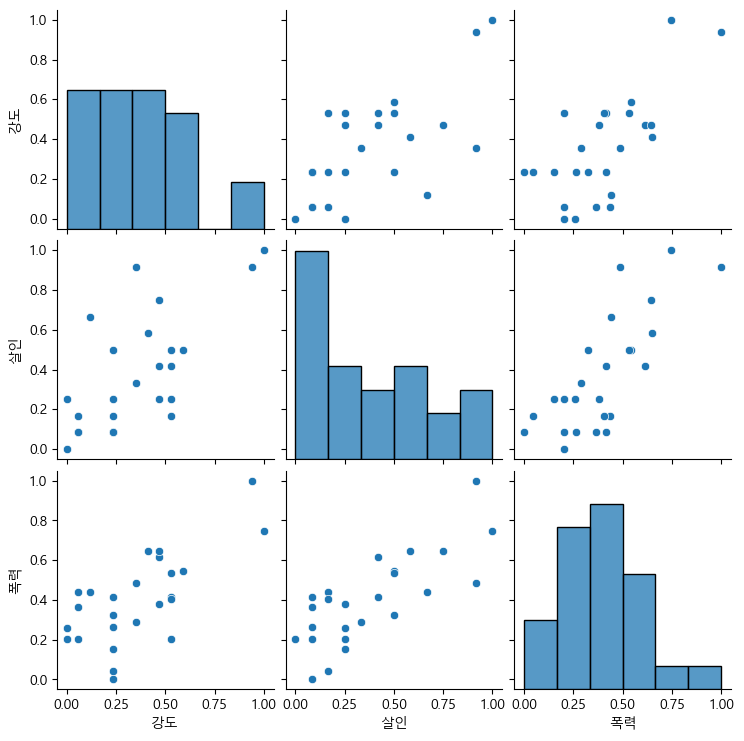

In [68]:
%matplotlib inline
sns.pairplot(crime_anal_norm, vars=["강도","살인","폭력"])

### (2) 인구수, CCTV, 강도, 살인 간의 상관 관계

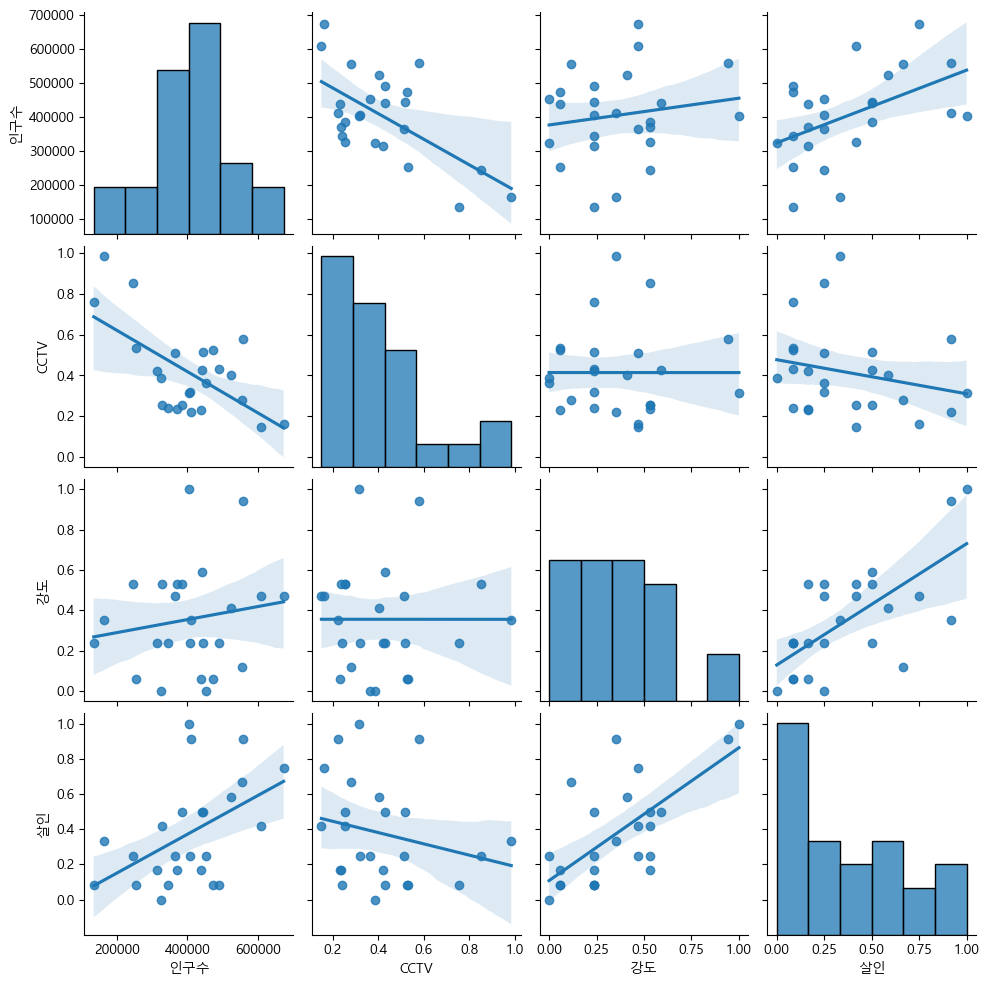

In [69]:
%matplotlib inline
sns.pairplot(crime_anal_norm, vars=["인구수","CCTV","강도","살인"], kind="reg")
plt.show()

### (3) 살인과 폭력검거율과 인구수 및 CCTV의 상관 관계

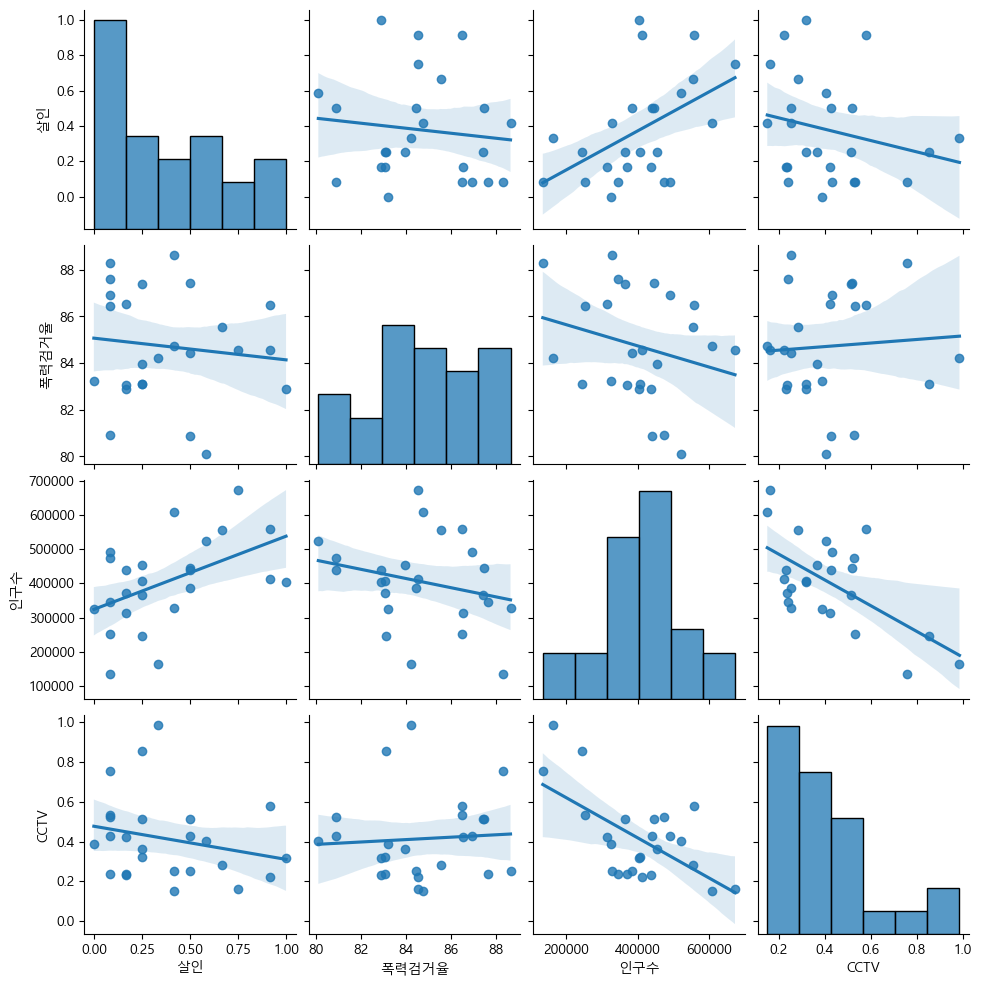

In [70]:
%matplotlib inline
sns.pairplot(crime_anal_norm, vars=["살인","폭력검거율","인구수","CCTV"], kind="reg")
plt.show()

### (4) 지역별 검거율

In [71]:
crime_anal_norm["검거율"] = crime_anal_norm["검거율"] / crime_anal_norm["검거율"].max() * 100
crime_anal_norm["검거율"]

구별
강남구      85.463066
강동구      85.550226
강북구      94.070728
강서구      96.572809
관악구      85.212224
광진구      96.375820
구로구      75.277906
금천구      97.997139
노원구      88.646174
도봉구     100.000000
동대문구     95.444250
동작구      74.633368
마포구      85.925381
서대문구     88.875144
서초구      77.181692
성동구      94.088810
성북구      89.727243
송파구      85.103066
양천구      81.823827
영등포구     81.958753
용산구      94.776790
은평구      86.842386
종로구      84.141835
중구       74.122650
중랑구      87.066663
Name: 검거율, dtype: float64

In [72]:
##### 정렬

crime_anal_norm_sort = crime_anal_norm.sort_values(by="검거율")
crime_anal_norm_sort

,폭력,살인,강도,강간,절도,폭력검거율,살인검거율,강도검거율,강간검거율,절도검거율,인구수,CCTV,범죄,검거율
구별,,,,,,,,,,,,,,
중구,0.263497,0.083333,0.235294,0.195965,0.532831,88.309353,66.666667,66.666667,65.294118,33.712716,135139,0.756998,1.310920,74.122650
동작구,0.151233,0.250000,0.235294,0.527378,0.287765,83.089005,100.000000,55.555556,48.771930,35.442359,406715,0.320126,1.451670,74.633368
구로구,0.543439,0.500000,0.588235,0.515850,0.456405,80.877951,75.000000,73.333333,58.362989,38.072805,440396,0.427797,2.603930,75.277906
서초구,0.326064,0.500000,0.235294,0.838617,0.564047,87.453105,75.000000,66.666667,63.358779,41.404175,445164,0.515990,2.464022,77.181692
양천구,0.365391,0.083333,0.058824,0.051873,0.296735,80.908729,100.000000,50.000000,87.500000,35.555556,473087,0.524639,0.856156,81.823827
영등포구,0.745442,1.000000,1.000000,0.556196,0.682095,82.894737,85.714286,90.909091,62.033898,32.995951,403988,0.316098,3.983733,81.958753
종로구,0.288166,0.333333,0.352941,0.314121,0.402225,84.212822,83.333333,81.818182,76.303318,38.324176,164348,0.985105,1.690786,84.141835
송파구,0.646407,0.750000,0.470588,0.340058,0.780768,84.552352,90.909091,76.923077,80.909091,34.856437,671994,0.160865,2.987821,85.103066
관악구,0.647479,0.583333,0.411765,0.628242,0.589523,80.109157,88.888889,100.000000,69.062500,30.561715,522292,0.403797,2.860342,85.212224


Text(0.5, 1.0, '범죄 검거비율(정규화된 검거의 합으로 정렬)')

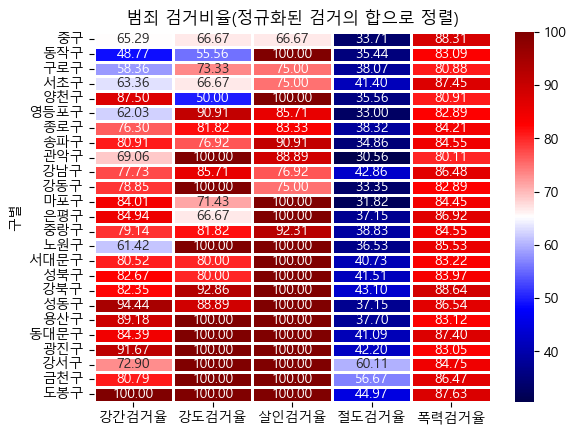

In [73]:
sns.heatmap(crime_anal_norm_sort[["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]],
            cmap="seismic", annot=True, fmt=".2f", linewidths=1)
# cmap = 색상
# annot = 수치표시
# fmt = 소수점관리
# linewidths, linewidth = 칸 간격

plt.title("범죄 검거비율(정규화된 검거의 합으로 정렬)")

In [74]:
?sns.heatmap

 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn','BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

### (5) 지역별 발생 건수

In [75]:
crime_anal_norm["범죄"] = crime_anal_norm["범죄"] / 5

In [76]:
crime_anal_norm_sort = crime_anal_norm.sort_values(by="범죄", ascending=False)

Text(0.5, 1.0, '범죄 발생비율(정규화된 범죄의 합으로 정렬)')

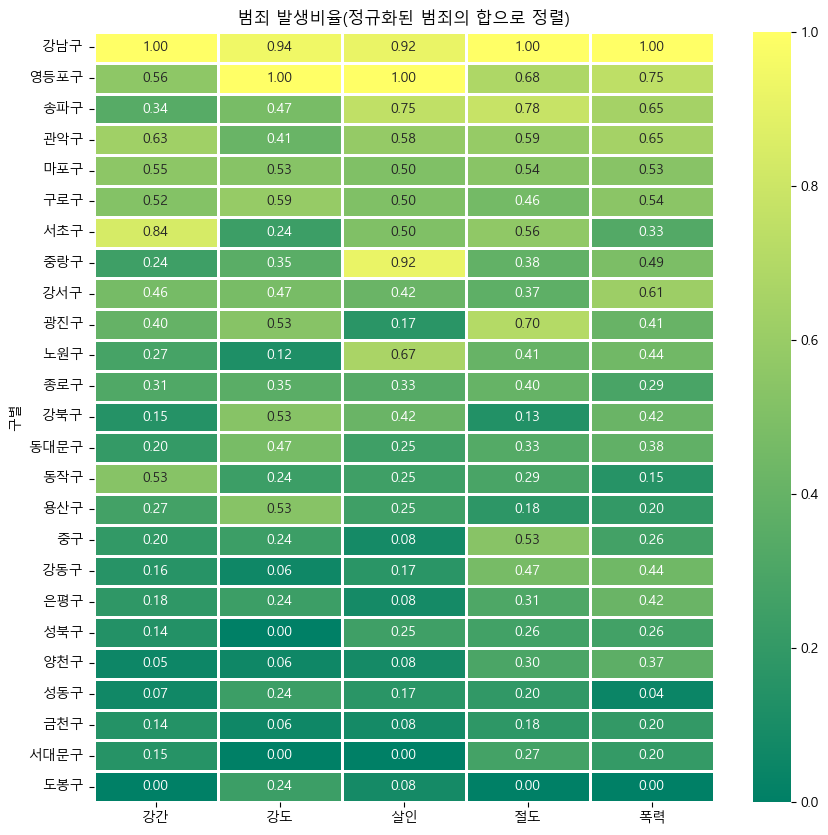

In [77]:
plt.figure(figsize = (10, 10))
sns.heatmap(crime_anal_norm_sort[["강간", "강도", "살인", "절도", "폭력"]],
            cmap="summer", annot=True, fmt=".2f", linewidths=1)

plt.title("범죄 발생비율(정규화된 범죄의 합으로 정렬)")

### (6) 지도 시각화

In [78]:
import folium

In [79]:
map = folium.Map(location=[37.4987464, 127.03169], zoom_start=10)
map

#### 1) 살인 사건이 발생한 지역

In [80]:
geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"

map.choropleth(geo_data=geo_path, data=crime_anal_norm["살인"], key_on="feature.id",
              columns=[crime_anal_norm.index, crime_anal_norm["살인"]], fill_color="PuRd")

# 툴팁으로 마우스만 가져다 대면 지역의 정보를 알 수 있게 해줌

folium.GeoJson(
    geo_path,
    tooltip=folium.features.GeoJsonTooltip(fields=["name"], aliases=[""], localize=True)).add_to(map)

map

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


#### 2) 범죄 사건이 발생한 지역

In [81]:
map = folium.Map(location=[37.500195,127.0229206], zoom_start=11)

In [82]:
geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"

map.choropleth(geo_data=geo_path, data=crime_anal_norm["범죄"], key_on="feature.id",
              columns=[crime_anal_norm.index, crime_anal_norm["범죄"]], fill_color="PuRd")


map

In [83]:
# 구 이름과 위도, 경도 정보를 담은 데이터프레임을 생성합니다.
gu_names = ["강남구", "강동구", "강북구", "강서구", "관악구", "광진구", "구로구", "금천구", "노원구", "도봉구", "동대문구", "동작구", "마포구", "서대문구", "서초구", "성동구", "성북구", "송파구", "양천구", "영등포구", "용산구", "은평구", "종로구", "중구", "중랑구"]
gu_latitudes = [37.5173, 37.5303, 37.6396, 37.5510, 37.4784, 37.5428, 37.4952, 37.4594, 37.6552, 37.6688, 37.5744, 37.5121, 37.5602, 37.5790, 37.4838, 37.5635, 37.6066, 37.5145, 37.5179, 37.5262, 37.5311, 37.6171, 37.5730, 37.5545, 37.6067]
gu_longitudes = [127.0470, 127.1237, 127.0257, 126.8495, 126.9518, 127.0838, 126.8877, 126.9084, 127.0777, 127.0454, 127.0400, 126.9397, 126.9088, 126.9367, 127.0324, 127.0365, 127.0291, 127.1066, 126.8660, 126.9019, 126.9810, 126.9277, 126.9909, 126.9946, 127.0958]
df_gu = pd.DataFrame({"name": gu_names, "latitude": gu_latitudes, "longitude": gu_longitudes})



for idx, row in df_gu.iterrows():
    folium.Marker(location=[row["latitude"], row["longitude"]], tooltip=row["name"]).add_to(map)

map

#### 3) 인구 대비 범죄 발생 비율

In [84]:
crime_pop= crime_anal_norm_sort["범죄"] / crime_anal_norm_sort["인구수"] * 100
crime_pop.sort_values()

구별
도봉구     0.000018
양천구     0.000036
서대문구    0.000038
성북구     0.000040
성동구     0.000045
은평구     0.000050
금천구     0.000053
강동구     0.000059
노원구     0.000069
동작구     0.000071
강서구     0.000077
송파구     0.000089
동대문구    0.000090
강북구     0.000100
관악구     0.000110
서초구     0.000111
중랑구     0.000116
용산구     0.000116
구로구     0.000118
광진구     0.000119
마포구     0.000138
강남구     0.000174
중구      0.000194
영등포구    0.000197
종로구     0.000206
dtype: float64

In [85]:
geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"   # json 파일

map.choropleth(geo_data=geo_path, data=crime_pop, 
               key_on = "feature.id", 
               columns = [crime_anal_norm_sort.index, crime_pop], 
               fill_color = "PuRd")
map

#### 4) 경찰서별 검거율과 구별 범죄 발생율을 동시에 시각화

In [86]:
cols = ["살인 검거","강도 검거","강간 검거","폭력 검거"]

norm = crime_anal_police[cols] / crime_anal_police[cols].max()


crime_anal_police["검거"] = np.sum(norm, axis=1)
crime_anal_police["검거"]

0     0.901884
1     1.200433
2     0.608234
3     1.400382
4     0.866354
5     2.231014
6     0.835367
7     2.259871
8     2.902008
9     3.510121
10    1.593932
11    1.707695
12    2.960259
13    0.794552
14    2.469763
15    1.657827
16    2.758245
17    2.347225
18    2.992131
19    2.857879
20    1.814871
21    0.863647
22    2.408389
23    1.849740
24    1.642732
25    2.879495
26    2.379001
27    0.597671
28    1.035859
29    1.503819
30    1.842638
Name: 검거, dtype: float64

In [87]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,위도,경도,검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.56361812722828,126.98958691395208,0.901884
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.57185082446809,126.98417036713045,1.200433
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.55477683026614,126.97349503706043,0.608234
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.5649023404956,126.966790740735,1.400382
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.5718915247338,126.998935936567,0.866354


In [88]:
map = folium.Map(location=[37.4987464, 127.03169], zoom_start=10)

for i in crime_anal_police.index:
    folium.Marker(location = [crime_anal_police["위도"][i],
                            crime_anal_police["경도"][i]],
                  icon= folium.Icon(color="red", icon="star"),
                  popup=crime_anal_police["관서명"][i]).add_to(map)

map

In [89]:
map = folium.Map(location=[37.4987464, 127.03169], zoom_start=10)
geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"   # json 파일

map.choropleth(geo_data=geo_path, data=crime_pop, 
               key_on = "feature.id", 
               columns = [crime_anal_norm_sort.index, crime_pop], 
               fill_color = "PuRd")
    
map

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [90]:
##### 경찰서 위치를 지도에 마킹

map = folium.Map(location=[37.4987464, 127.03169], zoom_start=10)
geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"

   
for i in crime_anal_police.index:
    folium.CircleMarker(location = [crime_anal_police["위도"][i],
                 crime_anal_police["경도"][i]],
                 icon= folium.Icon(color="red", icon="star"),
                 popup=crime_anal_police["관서명"][i],
                        radius=crime_anal_police["검거"][i] *10,
                       color = "#3186cc",
                       fill_color="#31866cc").add_to(map)
map

In [91]:
cols = ["살인 검거", "강도 검거", "강간 검거", "절도 검거", "폭력 검거"]
norm = crime_anal_police[cols] / crime_anal_police.max()

crime_anal_police["검거"] = np.sum(norm, axis=1)
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,위도,경도,검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.56361812722828,126.98958691395208,1.275416
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.57185082446809,126.98417036713045,1.523847
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.55477683026614,126.97349503706043,0.907372
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.5649023404956,126.966790740735,1.978299
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.5718915247338,126.998935936567,1.198382


In [92]:
#### 경찰서 구역별로 범죄발생율과 검거율을 동시에 시각화

In [93]:
map = folium.Map(location=[37.4987464, 127.03169], zoom_start=10)
geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"

map.choropleth(geo_data = geo_path, data=crime_pop,
               key_on="feature.id",
               columns=[crime_anal_norm.index, crime_pop],
               fill_color="YlGn")

   
for i in crime_anal_police.index:
    folium.CircleMarker(location = [crime_anal_police["위도"][i],
                 crime_anal_police["경도"][i]],
                 icon= folium.Icon(color="red", icon="star"),
                 popup=crime_anal_police["관서명"][i],
                        radius=crime_anal_police["검거"][i] *10,
                       color = "#3186cc",
                       fill_color="#31866cc").add_to(map)
    
    
    
map

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
